In [36]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib                 # pip install cdlib #
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality             # pip install pquality #
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

# Codici utili per tutti gli algortimi 

In [37]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [38]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

In [39]:
#Da utilizzare per i confronti
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

Importazione dati

In [31]:
community_path = "../content/Dati/"

In [32]:
path = '../content/Real_Network.graphml'

In [40]:
G = nx.read_graphml('Real_Network.graphml')

# 4 - Infomap

In [66]:
infomap_coms = cdlib.algorithms.infomap(G)

In [67]:
print(print_bold_str("Average Internal Degree:"), infomap_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), infomap_coms.internal_edge_density())
print(print_bold_str("Conductance:"), infomap_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), infomap_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), infomap_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), infomap_coms.modularity_density())
print(print_bold_str("Z Modularity:"), infomap_coms.z_modularity())
print(print_bold_str("Triangle Partecipation Ratio:"), infomap_coms.triangle_participation_ratio())

print(print_bold_str("N_Community:"), len(infomap_coms.communities))

max_com_len = 0
for com in infomap_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)  

Average Internal Degree: FitnessResult(min=1.0, max=19.381818181818183, score=3.2204027195103953, std=2.3824052279840995)
Internal Edge Density: FitnessResult(min=0.004258435961640009, max=1.0, score=0.6337837492475435, std=0.3652293822200047)
Conductance: FitnessResult(min=0.0, max=0.8829953198127926, score=0.4678081590463603, std=0.18652675451716627)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.4035544692337002, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.3902780519240632, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=-196.92674580667466, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=2.7114036558607424, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.6336927066693016, std=0.39132596511260653)
N_Community: 706
Max_Dim_Community: 594


In [68]:
with open('infomap.pickle', 'wb') as f:
    pickle.dump(infomap_coms, f)

In [69]:
infomap_tuple = [tuple(x) for x in infomap_coms.communities]

{'594': 1, '291': 1, '250': 1, '160': 1, '159': 1, '140': 1, '130': 1, '110': 1, '109': 1, '93': 1, '88': 2, '82': 1, '77': 1, '69': 1, '68': 2, '65': 1, '64': 1, '62': 1, '61': 1, '59': 1, '57': 3, '55': 4, '54': 3, '53': 1, '51': 1, '50': 2, '47': 1, '46': 1, '44': 3, '43': 2, '42': 3, '41': 2, '40': 1, '39': 2, '37': 1, '36': 3, '35': 4, '34': 6, '33': 3, '32': 5, '31': 4, '30': 4, '29': 5, '28': 9, '27': 4, '26': 2, '25': 7, '24': 5, '23': 2, '22': 14, '21': 11, '20': 6, '19': 14, '18': 16, '17': 11, '16': 14, '15': 10, '14': 10, '13': 11, '12': 15, '11': 14, '10': 19, '9': 18, '8': 27, '7': 19, '6': 25, '5': 26, '4': 54, '3': 88, '2': 169}


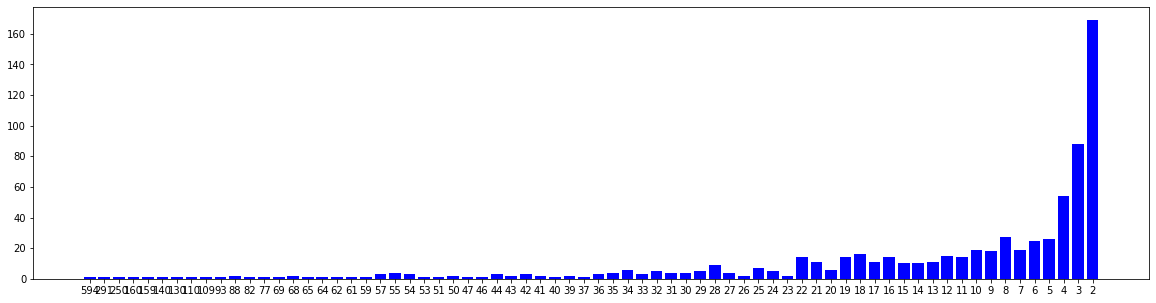

In [70]:
plot_communities_dimentions(infomap_tuple)

In [72]:
results = pquality.pquality_summary(G, infomap_tuple)
results['Indexes']

,min,max,avg,std
Index,,,,
Internal Density,0.004258,1.000000,0.633784,0.365229
Edges inside,1.000000,2487.000000,37.274788,123.047175
Average Degree,1.000000,19.381818,3.220403,2.382405
FOMD,0.000000,0.500000,0.175062,0.190100
TPR,0.000000,1.000000,0.633693,0.391326
Expansion,0.000000,20.391753,3.499336,3.042585
Cut Ratio,0.000000,0.002025,0.000339,0.000296
Conductance,0.000000,0.882995,0.467808,0.186527
Normalized Cut,0.000000,0.949441,0.468633,0.187305


In [73]:
results['Modularity']

,value
Index,
Modularity (no overlap),0.390278
